<img src="images/logo/selene-logo-640.png" style="max-height:75px;" alt="SELENE Logo" />

**Disclaimer:** This Jupyter Notebook contains content generated with the assistance of AI. While every effort has been made to review and validate the outputs, users should independently verify critical information before relying on it. The SELENE notebook repository is constantly evolving. We recommend downloading or pulling the latest version of this notebook from Github.

# Curse of Dimensionality

The **curse of dimensionality** refers to a set of challenges that arise when working with data in high-dimensional spaces. As the number of dimensions (features or variables) increases, the volume of the space grows exponentially, making data points become sparse. This sparsity means that concepts and intuitions from low-dimensional spaces, such as distance, density, or similarity, no longer behave as expected. For example, in high dimensions, points tend to be almost equidistant from one another, which makes distinguishing between "close" and "far" neighbors much harder.

In **data mining and data analysis**, the curse of dimensionality poses significant obstacles. Many algorithms, such as clustering or nearest-neighbor search, rely heavily on distance or similarity measures. When these measures lose their discriminative power in high dimensions, the algorithms may struggle to identify meaningful patterns. Additionally, visualization and interpretation of data become more difficult because human intuition is limited to three dimensions. As a result, analysts often face challenges in understanding or validating the structures and relationships that algorithms uncover.

In **machine learning tasks**, the curse of dimensionality impacts both efficiency and effectiveness. With too many features, models may require exponentially more training data to generalize well, leading to overfitting when data is insufficient. High dimensionality can also make optimization harder, as the search space for parameters becomes vast and complex. Feature selection, dimensionality reduction, and regularization techniques are often employed to combat these problems by reducing the effective number of dimensions and focusing on the most informative features.

Learning about the curse of dimensionality is crucial because it highlights the importance of carefully handling high-dimensional data. Understanding these challenges enables practitioners to design better preprocessing pipelines, select appropriate algorithms, and avoid common pitfalls that lead to misleading results. By appreciating the impact of dimensionality, one can apply techniques such as principal component analysis (PCA), autoencoders, or manifold learning to reduce dimensionality and improve both computational efficiency and model performance. In short, awareness of the curse of dimensionality is essential for extracting meaningful insights from complex datasets in modern data-driven applications.

### Setting up the Notebook

#### Make Required Imports

This notebook requires the import of different Python packages but also additional Python modules that are part of the repository. If a package is missing, use your preferred package manager (e.g., [conda](https://anaconda.org/anaconda/conda) or [pip](https://pypi.org/project/pip/)) to install it. If the code cell below runs with any errors, all required packages and modules have successfully been imported.

In [1]:
from src.utils.helpers.curseofdim import *
from src.utils.plotting.curseofdim import *

---

## Motivation &mdash; Illustrating the Curse of Dimensionality

High-dimensional data arises naturally in many modern applications because observations are often described by a large number of variables or features. Some common application areas that often involve high-dimensional datasets include:

* **Text and Natural Language Processing (NLP):** Common NLP tasks that rely on text as input are document classification/clustering, sentiment analysis, information retrieval, machine translation, language modeling, and others. Words, phrases, or documents are typically represented as vectors over a large vocabulary (tens of thousands of words or subwords). Even with modern word embeddings, each token may have hundreds or thousands of dimensions.

* **Genomics and Bioinformatics:** This field of research uses data analysis and machine learning for tasks such as cancer subtype classification, biomarker discovery, personalized medicine, etc. Gene expression profiles, DNA microarrays, and sequencing technologies generate measurements for tens of thousands of genes or proteins, often with only a few hundred samples.

* **Computer vision and image processing:** Image classification, image segmentation, object detection, facial recognition, and more belong to some of the most prominent and widely used machine learning tasks. Raw images are arrays of pixels, and even a modest image (e.g., 256x256 with 3 RGB channels) has nearly 200,000 features. Extracted features like edges, textures, or embeddings can add further dimensions.

* **Audio and speech processing:** Google Assistant, Apple's Siri, Amazon's Alexa, or Samsung's Bixby have become widely used voice assistants, which require the processing of noise audio signals. Such audio signals are often represented as spectrograms or wavelet transforms with thousands of frequency–time coefficients.

Other applications that often require to work with high-dimensional data are in the area of **finance and economics** and **sensor networks and IoT**. In data analysis and machine learning, the common attitude is: the more data, the better. However, this generally refers only to the number of data points or data samples in a dataset, and less so to the number of features. In the following, we will try to visualize and explain the phenomena that often come with high-dimensional data, and what this means for data analysis, data mining, machine learning and similar methods.

### Data Sparsity

Many to most machine learning, data mining, and data analysis methods are statistical by nature. Statistical methods generally require **dense data** because reliable parameter estimation depends on having enough observations with meaningful, non-missing values across the feature space. In dense datasets, each variable (i.e., dimension) is sufficiently populated with information, which allows the model to detect stable patterns and estimate relationships accurately. Without dense coverage, the model may fail to capture the underlying distribution of the data, leading to biased or highly variable estimates.

Moving from low-dimensional to high-dimensional data increase the risk of dealing with **sparse data**. To illustrate this, let's assume we have a dataset containing 15 data points with different labels &mdash; although the labels are not that important here. Depending if the data points have 1, 2, or 3 features, we can place the all 15 data points into 1d, 2d, and 3d features spaces; see the figure above. We also split each feature space into equal-sized bins with a length of 1/3 of the feature space with respect to each dimension.

<img src="images/illustrations/curseofdim/curseofdim-sparsity-example-01.png" style="margin:auto;max-width:800px;width:100%" alt="Data Sparsity Example" />

<br />

Notice how with an increased number of dimensions, the average number of data points per bin &mdash; that is, the data density &mdash; goes down. In fact, in the 3d features space, some bins must be empty since we have 27 bins but only 15 data points. In other words, many regions in our feature space are unpopulated which significantly lowers the probability that a statistical model will detect stable patterns in the data. If we would try to preserve the data density with an increasing number of dimensions, we would need exponentially more data points.

Another way to understand the challenges that come with data sparsity is to consider a feature space where each feature value is between 0 and 1, and let's assume $N$ data points are randomly and uniformly distributed within this feature space. Now we are looking at the approximate size of a subspace of that feature space that will contain $k$ data points. This subspace is a line of length $L$ in 1d, a square of length $L$ in 2d, a cube of length $L$ in 3d, and a hypercube in higher dimensions. The figure below illustrates this setup.

<img src="images/illustrations/curseofdim/curseofdim-sparsity-example-02.png" style="margin:auto;max-width:800px;width:100%" alt="Data Sparsity Example" />

Note that, since we assume the $N$ data points are randomly and uniformly distributed, it does not matter where we place the line, square, or cube in their respective feature space. The random and uniform distribution of the data points also means that we can easily approximate the length/area/volume of the line/square/cube as the ratio between the $k$ data points we want to capture and the $N$ total data points. This in turn allows us to compute $L$. More formally, we have:

$$\large
L^d \approx \frac{k}{N}\quad \Rightarrow\quad L \approx \left( \frac{k}{N} \right)^{\frac{1}{d}}
$$

With this formula, we can now compute $L$ for different numbers of dimensions $d$, for any fixed choice for $k$ and $N$. In fact, we can only focus on the ratio $k/N$ instead of both individual values. So let's do this and plot the results. In the code cell below, we first generate a list of feature space sizes. To keep it simple, we consider only powers of two, i.e., $[1, 2, 4, 8, 16, \dots]$. For each size, we then compute $L$ using the formula from above; we use a ratio of $k/N=0.1$ (e.g., $k=100$ and $N=1,000$) here &mdash; however, feel free to change this ration by adjusting the variable `k_over_N` and observe the effect on the results.

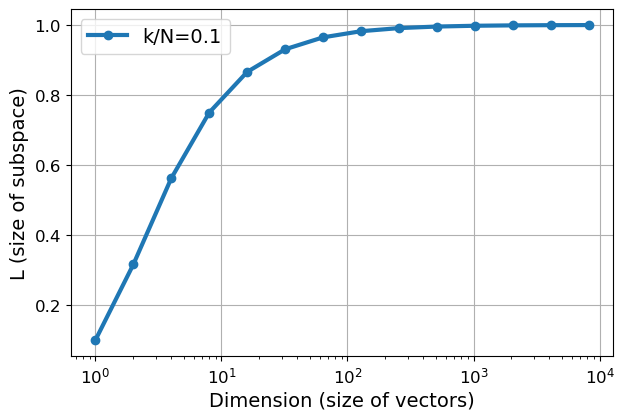

In [2]:
# Generate a list of increases feature space size
dims = [ 2**exp for exp in range(14)]  # [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

# Compute L for each feature space size
k_over_N = 0.1
Ls = [ k_over_N**(1/d) for d in dims]

# Plot the result using provided auxiliary method
plot_subspace_sizes(dims, Ls, k_over_N)

<br />

The results show that for high dimensions the size of the subspace is getting closer and closer to the size of the whole feature space. Thus, in high dimensions, the data spreads so thinly that to capture a non-negligible fraction of points, we are forced to include nearly all of the space. It means that notions like "local neighborhoods", "clusters", or "dense regions" become less meaningful as dimensionality grows. In high dimensions, any subspace that contains a reasonable fraction of the data is not truly "local" anymore &mdash; it covers almost the entire space. However, **locality** is a fundamental principle in machine learning and statistical modeling, as many algorithms rely on the assumption that points close in feature space exhibit similar behavior. Locality also stabilizes statistical estimation: non-parametric regression and density estimation depend on local neighborhoods to provide reliable predictions and accurate probability estimates. Additionally, locality helps control model complexity by allowing algorithms to focus on local patterns rather than global relationships, as seen in decision trees and convolutional neural networks.

### Distances in High Dimensions

Data sparsity and lack of locality also directly affects similarities or distances between data points, which underpins similarity-based methods like k-nearest neighbors, clustering, kernel methods, and recommender systems, where nearby points are expected to share labels or properties. Again, to get a better intuition of this phenomenon, let's try to visualize this problem using simple approaches.

First, let's assume we have a dataset with $N$ randomly generated data samples each of size $d$; each of the $d$ feature values is in the range $[-1, +1]$. We can now compute the distances between all pairs of data points and plot the distributions of lengths using a histogram. The code cell below accomplishes this by first creating a matrix `X` with `n_vecs` random vectors of size `n_dim` &mdash; again, try different values for both variables and observe their effects. The provided auxiliary methods `compute_pairwise_distances()` and `plot_pairwise_distance_histogram()` then compute all pairwise distances &mdash; using the **Euclidean distance** &mdash; and plot the distribution.

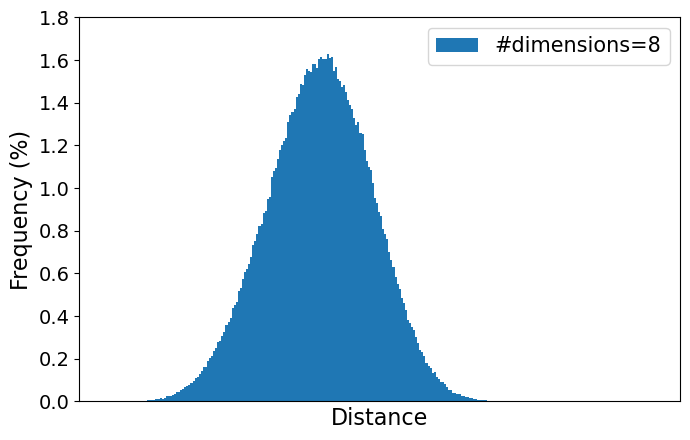

In [3]:
n_vecs, n_dim = 1000, 8

# Create a random matrix with n_vecs vectors of size n_dim
X = np.random.rand(n_vecs, n_dim)

# Compute pairwise distances between vectors
pairwise_distances = compute_pairwise_distances(X)

# Plot histogram of pairwise distances
plot_pairwise_distance_histogram(pairwise_distances, n_dim)

To better observe the trend of the distribution for increasing number of dimensions, the animation below loops through the resulting plots for different numbers of dimensions. All numbers of dimensions are a power of two and of the range $[2,4, 8, \dots, 8192]$.

<img src="images/animations/curseofdim/curseofdim-pairwise-distance-histograms.gif" style="max-width:700px;width:100%" alt="Histogram of Pairwise Distances" />

As the results clearly show, the variance of the pairwise distances between data points becomes very small in higher dimensions. Practically, every point ends up being "almost equally far" from every other point, making it harder to distinguish meaningful neighbors or other meaningful patterns.

The Euclidean distance quantifies similarity/dissimilarity by measuring the absolute geometric distance between the vector endpoints. It is therefore a commonly applied distance metric in clustering and k-nearest neighbor algorithms. An common alternative similarity metric is the cosine similarity. While the Euclidean distance considers both the direction and magnitude of vectors, the **cosine similarity** only considers the direction. In simple terms, two vectors are similar if they point in a similar direction. In contrast, a small absolute cosine similarity means that the two vectors are almost orthogonal. 

For the next test, we provide the auxiliary method `test_orthogonality()`. This method first creates 1,000 (by default) random vectors for a given number of dimensions `n_dim`, and then computes the ratio of pairs of vectors with a cosine similarity below a user-defined threshold. For example, the code cell below uses this method to compute the ratio vector pairs (each vector having $10$ features) with a cosine similarity less than $0.1$. Try changing the values for `n_dim` and `min_cos_sim` to see how the resulting ratio changes.

In [4]:
n_dim, min_cos_sim = 10, 0.1

print(f"Ratio of almost orthogonal pairs of vector (size {n_dim}): {test_orthogonality(n_dim, min_cos_sim=min_cos_sim):.2f}")

Ratio of almost orthogonal pairs of vector (size 10): 0.62


With the method `test_orthogonality()` we can now check how this ratio changes when increasing the number of dimensions. To this end, we again again consider powers of 2 as the different number of dimensions we want to consider. For each dimension, we use this auxiliary method to compute the corresponding ratio of vector pairs with a cosine similarity below threshold. In the code cell, below we consider both $0.1$ and $0.01$ as thresholds for the minimum cosine similarity.

In [5]:
dims = [ 2**exp for exp in range(14)]  # [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

ratios1  = [ test_orthogonality(n_dim, min_cos_sim=0.1)  for n_dim in dims ] 
ratios01 = [ test_orthogonality(n_dim, min_cos_sim=0.01) for n_dim in dims ] 

Using another auxiliary method `plot_orthogonalities()` we can also plot the result to better visualize the trends.

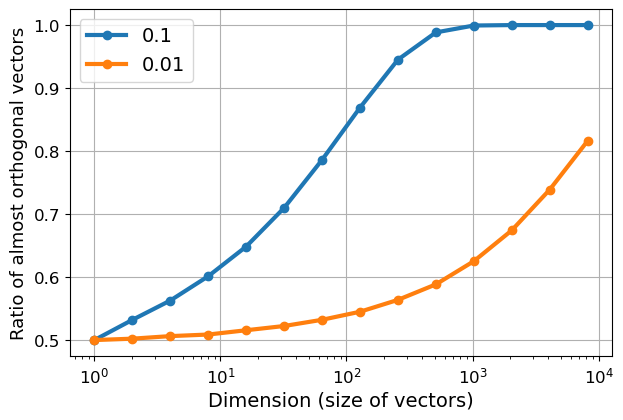

In [6]:
plot_orthogonalities(dims, [ratios1, ratios01], labels=[0.1, 0.01])

We can see that the higher the number of dimensions, the more likely the vectors are almost orthogonal to each other. As the number of dimensions $d$ increases, the angle between two randomly chosen vectors tends to be close to $90^\circ$, and their cosine similarity tends toward zero. This happens because each dimension contributes a small, roughly independent component to the dot product, and with many dimensions, positive and negative contributions largely cancel out, leaving the vectors nearly perpendicular. Formally, if $\mathbf{u}$ and $\mathbf{v}$ are two random vectors in $\mathbb{R}^d$, their cosine similarity is

$$\large
\cos\theta = \frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\|\|\mathbf{v}\|}.
$$

As $d \to \infty$, $\mathbf{u} \cdot \mathbf{v}$ grows more slowly than $\|\mathbf{u}\|\|\mathbf{v}\|$, causing $\cos\theta \to 0$. Intuitively, in high dimensions, there are so many orthogonal directions that it becomes extremely unlikely for two random vectors to align closely along any particular dimension. In short, in high-dimensional spaces, most vectors are nearly perpendicular simply due to geometry, which changes how we interpret similarity, distance, and structure in such data.

---

## Challenges of High-Dimensional Data

We already outlined some of the fundamental challenges that come when working with high-dimensional data in the previous section. We now elaborate more on these challenges by giving more concrete example how a high number of dimensions can negatively affect tasks such as data analysis or model training.

### Increased Computational Complexity

The table below shows the runtime complexity using the [**Big-O**](https://en.wikipedia.org/wiki/Big_O_notation) notation a range of popular data mining and machine learning algorithms &mdash; assuming their standard implementation and ignoring any more sophisticated optimization strategies. In this table, $n$ denotes the number of samples and $d$ the number of features (i.e., dimensions). Some algorithms (like neural nets or logistic regression) depend heavily on the number of iterations/epochs $T$, and tree-based methods depend on the number of trees or depth. Such additional parameters are defined in the "Notes" column.

| Algorithm                  | Training Complexity                          | Prediction Complexity                  | Notes |
|-----------------------------|-----------------------------------------------|-----------------------------------------|-------|
| k-Nearest Neighbors (kNN)  | $O(1)$                                          | $O(nd)$                        | No real training but all data needs to be stored; prediction expensive in high d |
| Linear Regression (OLS)    | $O(nd^2 + d^3)$                                   | $O(d)$                                    | Solving normal equations; faster with gradient descent (GD) |
| Logistic Regression (GD)   | $O(ndT)$                                       | $O(d)$                                    | T = number of iterations |
| Naïve Bayes                | $O(nd)$                                         | $O(d)$                                    | Training involves counting; very fast |
| Decision Tree              | $O(nd\log{n})$                                  | $O(depth) \approx O(\log{n})$                     | Depends on number of splits and $depth$ of tree |
| Random Forest              | $O(n_{trees}nd\log{n})$                          | $O(n_{trees}\log{n})$                        | $n_{trees}$ = number of trees |
| Support Vector Machine (SVM, linear) | $O(ndT)$                           | $O(d)$                                    | $T$ = number of iterations |
| SVM (non-linear, kernel)   | $O(n^2d + n^3)$                                  | $O(n_{supvecs}d)$                  | $n_{supvecs}$ = number of support vectors |
| k-Means Clustering         | $O(ndkT)$                                    | $O(kd)$                        | $k$ = clusters, $T$ = iterations |
| DBSCAN Clustering         | $O(n^2d)$                                    | $O(nd)$                        | Assuming naive search scanning all points |
| Neural Networks (MLP)      | $O(ndhT)$                                    | $O(dh)$                                  | $h$ = hidden units, $T$ = epochs |
| Gradient Boosted Trees     | $O(n_{trees}nd\log{n})$                          | $O(n_{trees}\log{n})$                        | $n_{trees}$ = number of trees |
| Apriori (Frequent Itemsets)| Exponential in $d$ (worst case)                 | &mdash;                                       | Very costly for high dimensions |

As the table shows &mdash; and this should not come as a surprise &mdash; the runtime complexity of data mining and machine learning algorithms depends on the number of dimensions $d$. Thus, reducing the number of dimensions in a dataset directly improves runtime performance because most data mining and machine learning algorithms scale at least linearly, and often quadratically, with the number of features $d$. Every additional dimension increases the cost of computing distances, matrix operations, or model updates. By lowering $d$, these repeated operations become faster, often making the difference between a feasible and infeasible analysis on large datasets.

### Decreased Quality of Results

At a high level, high-dimensional data can negatively affect data analysis and machine learning because as the number of features grows. With too many features relative to the number of samples, the data no longer provides reliable information to learn meaningful and stable patterns, making statistical estimates unstable and model predictions less accurate. To summarize some of the insights we made previously, high-dimensional data often cause the following phenomena that can seriously degrade the performance of data analysis and machine learning methods:

* **Data sparsity:** As the number of dimensions grows, the volume of the space expands exponentially. This means that a fixed number of data points become extremely spread out, making the space they inhabit mostly empty. As a result, every data point appears to be far away from every other point, making it difficult for algorithms to find meaningful relationships, clusters, or patterns.

* **Meaningless distance metrics:** Many machine learning algorithms, particularly those that rely on measuring the similarity between data points (e.g., k-Nearest Neighbors, clustering), use distance metrics like Euclidean distance. In high-dimensional spaces, the distance between the closest and farthest data points becomes almost indistinguishable. This "distance concentration" makes it difficult for these algorithms to make effective predictions because they can't reliably determine which points are "neighbors".

* **Overfitting:** With many features, a model can become overly complex and start to fit the noise in the training data rather than the underlying patterns. This is because having more dimensions offers more opportunities for the model to find spurious correlations that do not actually exist in the real world but are just an artifact in the given training data. A model that is overfit will perform exceptionally well on the training data but fail miserably when presented with new, unseen data, which is a major concern for a model's ability to generalize.

Although not required to be considered high-dimensional data, a special case is when the dataset contains more features than data samples, i.e., $d > n$. While all the previously mentioned issues naturally still apply, the condition $d > n$ adds additional concerns to some machine learning methods. For example, linear models such Linear Regression and Logistic Regression no longer have a unique solution but, in fact, now have infinitely many solutions. We also say that such models are **over-parameterized**. While regularization methods (e.g., L1 or L2) resolve this by imposing constraints that pick a unique solution, the model is still likely to suffer from overfitting &mdash; simply speaking, the unique solution is not a good solution. Over-parameterization also affects techniques to reduce the dimensionality of a dataset (discussed in more detail later on). For example, Linear Discriminant Analysis (LDA) requires inverting the so-called within-class covariance matrix. When $d > n$,this matrix is singular, so no unique solution exists. Principal Component Analysis (PCA) still works, but you can extract at most $n$ meaningful components since the covariance matrix has rank $\leq n$.

---

## Dimensionality Reduction &mdash; An Overview

Now that we know that high-dimensional data cause many concerns, how can we potentially address these by reducing the number of dimensions. Common strategies can be grouped into two basic categories: **feature selection** (removing features) and **feature extraction** (generating new features by transforming original features). Both categories and their respective strategies are topics on their own, and the purpose of this section is to provide a brief overview.

### Feature Selection

The seemingly straightforward approach to reduce the dimensionality of a dataset is to remove features. The question is, of course, which features can be "safely" removed so any subsequent analysis or training is unlikely to be negatively affected by the step. However, there are a number of common or valid reasons why features might be dropped. Let's have a look at some of them:

* **Domain knowledge:** Depending on the given data and task, one can (and often should) exclude features from the analysis or training based domain knowledge. The most obvious cases are irrelevant features &mdash; that is, features unrelated to the phenomenon of interest. For example, when training a model to predict the risk of heart issues based on patients' data, there is arguably no plausible link between a, say, patient's email address or name to the outcome. Domain knowledge is also important to spot spurious correlations, where features that look predictive but are artifacts of data collection (e.g., timestamp fields reflecting when data was entered, not actual events).

* **Low data quality:** There can be various problems with the data that would recommend removing features. For example, a feature might have too many missing values which may not be recoverable in a meaningful way (i.e., without relying on questionable estimates). The values of features may also be very noisy or even corrupted, for example, by incorrectly recording/measuring them or the value showing many inconsistencies or outliers &mdash; typically detected as part of the exploratory data analysis (EDA). Lastly, feature values may show a low or even zero variance. A feature with the same value across most samples provides no discriminatory power. While data cleaning and preprocessing steps (e.g., outlier removal, estimating missing values) can help to improve the data quality, it is often the safer bet to remove such features.

* **Low statistical or informational value:** Just because a dataset has many features does not mean that all features are equally useful regarding their statistical or informational value for a given task. Features that have little or no correlation with the target (in supervised learning) may be discarded as they have only a low predictive power. Furthermore, different features may capture the same or very similar information resulting in redundancy or multicollinearity. Features that are highly correlated with each other (e.g., one is a linear combination of others) can cause instability in models.

* **Practical constraints:** In practice, often the accuracy of a model is less important than having both quick and interpretable results. It is therefore a common practice to initially focus on only a subset of the arguably most important features (often informed by domain knowledge). For example, simplifying knowing whether the blood pressure or the average heart rate is a better predictor for a heart attack may be more useful than the actual predictive power of the model. Another common practical constraint are privacy or legal concerns, particularly when features may contain sensitive data (e.g., personal identifiers, protected attributes) that should not be used. For example, the decision whether a bank accepts or rejects a credit application should not depend on the customer's ethnicity or religion; this is indeed against the law in many countries.

While some features can be removed just by eye-balling the data and with some basic domain knowledge, identifying a low data quality or a low statistical value is often not trivial in practice. There are several systematic methods to identify and remove weak or problematic features before model training. **Variance thresholding** eliminates features with little to no variability, since they contribute no useful information. **Correlation filtering** checks for redundancy by removing one of a pair of highly correlated features (or using metrics like **Variance Inflation Factor (VIF)** to detect multicollinearity). In supervised tasks, **mutual information** or **univariate statistical tests** (e.gå., chi-square, ANOVA F-test) can help identify features with little relationship to the target. Beyond these, **model-based approaches** such as tree-based feature importance scores or recursive feature elimination (RFE) provide a way to rank and prune features. Combined with domain knowledge, these techniques balance statistical rigor and practical insight, ensuring that the final feature set is informative, efficient, and avoids redundancy or leakage.

### Feature Extraction

In contrast to simply removing features from a dataset, feature extraction techniques reduce dimensionality by transforming the original feature space into a lower-dimensional representation while retaining as much relevant information as possible. In a nutshell, feature extraction techniques generates *new* features as some form of summary, aggregation, or transformation of the original features. Broadly, they can be grouped into **linear methods**, **nonlinear methods**, **neural network-based methods**, and **domain-specific transformations**:

* **Linear methods:** Linear methods map high-dimensional data in a lower-dimensional space by finding new axes that are linear combinations of the original features. These new axes are chosen to capture as much important structure in the data as possible, such as variance, class separability, or latent factors. For example, **Principal Component Analysis (PCA)** finds directions (principal components) that maximize variance, while **Linear Discriminant Analysis (LDA)** finds projections that maximize the separation between classes. Because the transformations are linear, the resulting reduced representation is mathematically straightforward, computationally efficient, and often preserves global relationships in the data. However, linear methods assume that the meaningful structure of the data lies on or near a linear subspace, which may not always hold true for more complex, nonlinear datasets.


* **Nonlinear methods:** Unlike linear methods, which can only model straight-line relationships, nonlinear methods seek to preserve important relationships &mdash; such as local neighborhood distances or manifold geometry &mdash; while mapping the data into a lower-dimensional representation. Techniques like **t-SNE** and **UMAP** focus on maintaining local similarities between points, making clusters and patterns more apparent in the reduced space, while methods like **Isomap** aim to preserve global geodesic distances along the manifold. These approaches are particularly useful when data exhibits complex, nonlinear structures, such as images, text embeddings, or biological data, where linear projections fail to capture meaningful patterns. 

* **Neural network-based methods:** The basic idea behind neural network–based methods is to learn a compact, low-dimensional representation of the data through a neural network that encodes the original features into a smaller latent space and then reconstructs them as accurately as possible. A common approach is the **autoencoder**, which consists of an encoder network that compresses the input into a bottleneck layer (the reduced representation) and a decoder network that attempts to reconstruct the original input from this bottleneck. By training the network to minimize reconstruction error, the bottleneck layer captures the most salient features of the data in a lower-dimensional form. Neural network methods capture complex, nonlinear relationships, making them suitable for images, audio, text embeddings, and other high-dimensional datasets. Variants like **variational autoencoders (VAEs)** impose probabilistic constraints on the latent space, producing smoother and more interpretable representations. However, these methods require substantial computational resources, careful tuning, and large amounts of data for effective training.

* **Domain-specific transformations:** These methods leverage knowledge about the structure or characteristics of a particular type of data to create compact representations. Instead of relying solely on generic statistical or geometric properties, these methods transform the data using techniques tailored to the domain, preserving meaningful information while reducing dimensionality. For example, in text analysis, **Latent Semantic Analysis (LSA)** or **topic models** reduce a word-document matrix to a smaller set of latent concepts or topics, capturing semantic relationships. In signal processing, **Fourier or wavelet transforms** extract key frequency components from time-series or audio data, discarding less informative components. These approaches are effective because they exploit prior knowledge and inherent structure in the data, often resulting in more interpretable and task-relevant features than generic methods. However, they are typically specialized for a particular type of data, so their applicability outside the domain may be limited.

The table below lists some of the most popular methods for each of the for different groups.

| Category                     | Method                          | Key Idea / Usage                                               |
|-------------------------------|---------------------------------|----------------------------------------------------------------|
| **Linear Methods**            | Principal Component Analysis (PCA) | Projects onto directions of maximum variance (unsupervised).   |
|                               | Linear Discriminant Analysis (LDA) | Finds axes maximizing class separability (supervised).         |
|                               | Factor Analysis                 | Models variables as influenced by latent factors.              |
|                               | Independent Component Analysis (ICA) | Extracts statistically independent components.              |
| **Nonlinear / Manifold Learning** | t-SNE                        | Preserves local neighborhood structure; great for visualization. |
|                               | UMAP                            | Faster than t-SNE; preserves local and some global structure.  |
|                               | Kernel PCA                      | Nonlinear extension of PCA using kernels.                      |
|                               | Isomap                          | Preserves geodesic distances on manifolds.                     |
|                               | Locally Linear Embedding (LLE)  | Preserves local neighborhood relations.                        |
| **Neural Network–Based**      | Autoencoders                    | Neural networks that compress and reconstruct input data.       |
|                               | Variational Autoencoders (VAEs) | Probabilistic autoencoders with smooth latent spaces.           |
|                               | Deep Embeddings (e.g., word2vec, image embeddings) | Learn compact, task-specific vector representations. |
| **Domain-Specific**           | Fourier / Wavelet Transforms    | Capture frequency or time-frequency components in signals.      |
|                               | Latent Semantic Analysis (LSA)  | Reduces text dimensionality by capturing latent concepts.       |
|                               | Topic Models (e.g., LDA for text) | Represents documents with fewer semantic dimensions.           |

Feature extraction techniques are very powerful and often very useful to reduce the dimensionality of dataset, but they also come with their own challenges particularly regarding their runtime as interpretability their results (and the results of downstream tasks):

* **Runtime complexity:** Many methods &mdash; especially nonlinear ones like t-SNE, UMAP, or Isomap &mdash; scale poorly with the number of samples $n$ and features $d$. For example, t-SNE has a complexity of roughly $O(n^2)$, which makes it impractical for very large datasets, while PCA requires costly matrix decompositions ($O(\min(n \cdot d^2, n^2 \cdot d))$). Neural methods such as autoencoders add additional overhead from model training, requiring many iterations and large compute resources. This means dimensionality reduction itself can become a bottleneck before even applying downstream algorithms.

* **Interpretability:** Linear methods like PCA or LDA produce transformed features that are linear combinations of the original variables, which are often hard to map back to human-understandable concepts. Nonlinear approaches like t-SNE or UMAP make this even harder, as the new axes are abstract latent dimensions without a direct connection to the original features. Neural embeddings further obscure interpretability since the transformations are learned through complex networks. As a result, while dimensionality reduction can speed up downstream tasks and reveal structure, it often sacrifices transparency and the ability to explain results in the original feature space.

Lastly, as a side note, when literature or other (online) sources cover the topic of dimensionality reduction, they typically refer to feature extraction techniques (PCA, LDA, t-SNE, UMAP, LSA, etc.). Feature selection is more commonly associated with data preparation (e.g., data cleaning, data preprocessing, data filtering). However, since both feature selection and feature extraction are approaches to lower the dimensionality of a dataset, we include them here together.

---

## Summary

The **curse of dimensionality** refers to a set of challenges that arise when working with high-dimensional data. As the number of features $d$ increases, the volume of the feature space grows exponentially, causing data points to become sparse and distances between points to lose meaning. This sparsity makes it difficult to find meaningful patterns, compute reliable statistics, or perform tasks such as clustering, nearest-neighbor search, and density estimation. In high dimensions, even a large dataset may not adequately sample the space, leading to overfitting and poor generalization in machine learning models.

One major challenge is that many algorithms rely on distance or similarity measures between points. In high-dimensional spaces, pairwise distances between points tend to converge to similar values, making it hard to distinguish nearby points from distant ones. This phenomenon can degrade the performance of algorithms such as k-nearest neighbors, clustering methods like k-means, and density-based approaches like DBSCAN. Additionally, the number of parameters in many models grows with dimensionality, increasing computational cost and memory requirements. Another challenge is feature redundancy and noise. High-dimensional datasets often contain irrelevant or highly correlated features, which can obscure meaningful relationships. Models trained on such datasets may overfit to noise rather than capturing the true underlying patterns, reducing both predictive performance and interpretability. Moreover, visualizing and understanding high-dimensional data becomes nearly impossible without some form of reduction, complicating exploratory data analysis and model diagnostics.

To mitigate the curse of dimensionality, **dimensionality reduction techniques** are commonly employed. **Feature selection** methods remove irrelevant or redundant features based on statistical tests, correlation analysis, or model-based importance scores. **Feature extraction** techniques, on the other hand, transform the original features into a lower-dimensional space, often capturing the most informative aspects of the data. Linear methods like PCA and LDA are widely used for their simplicity and interpretability, while nonlinear methods like t-SNE, UMAP, and autoencoders can capture complex structures in the data. Domain-specific approaches, such as Fourier transforms for signals or topic modeling for text, leverage prior knowledge to retain meaningful information.

By reducing dimensionality, these strategies help improve **algorithm efficiency, model stability, and interpretability**. Lower-dimensional data require fewer computations, reduce the risk of overfitting, and make distance-based and density-based methods more reliable. While dimensionality reduction may sometimes discard information, careful application ensures that the most relevant structure is preserved, enabling more effective and scalable analysis of high-dimensional datasets.
